## Libraries

In [1]:
# install csep python library
#!pip install cartopy
#!pip install pyCSEP
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy
import csep
from csep.utils import datasets, time_utils, plots
from csep.core import poisson_evaluations as poisson
from scipy.stats import poisson as poisson_stat

import sys
import os
sys.path.append(os.path.abspath("../src"))
# import functions for hdf5 forecast format
import functions_for_hdf5_parallel as f_hdf5

## 2012

In [2]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2012-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2012-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

Fetched ComCat catalog in 2.436943769454956 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2012-01-02 07:02:46.080000+00:00
End Date: 2012-12-30 12:25:45.570000+00:00
Min Latitude: 31.5135 and Max Latitude: 42.8158333
Min Longitude: -125.3935 and Max Longitude: -113.126
Min Magnitude: 2.5
Found 1195 events in the ComCat catalog.

        Name: None

        Start Date: 2012-01-17 09:55:00.520000+00:00
        End Date: 2012-12-22 21:37:45.140000+00:00

        Latitude: (31.8735, 41.1431667)
        Longitude: (-125.3308333, -114.9953333)

        Min Mw: 3.95
        Max Mw: 5.6

        Event Count: 50
        


### ETAS

In [3]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyyy
                                     end_date = '31/12/2012')
#Optional to free memory space
del etas_filename
# cumulative forecast 
cumulative_ETAS = f_hdf5.get_cumulative_forecast(dict_fore = ETAS, # dictonary representing a set of forecasts 
                                                 forecast_name = 'ETAS', # name of the forecast used for plotting
                                                 all_dates = True) 
#Optional to free memory space
del ETAS

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


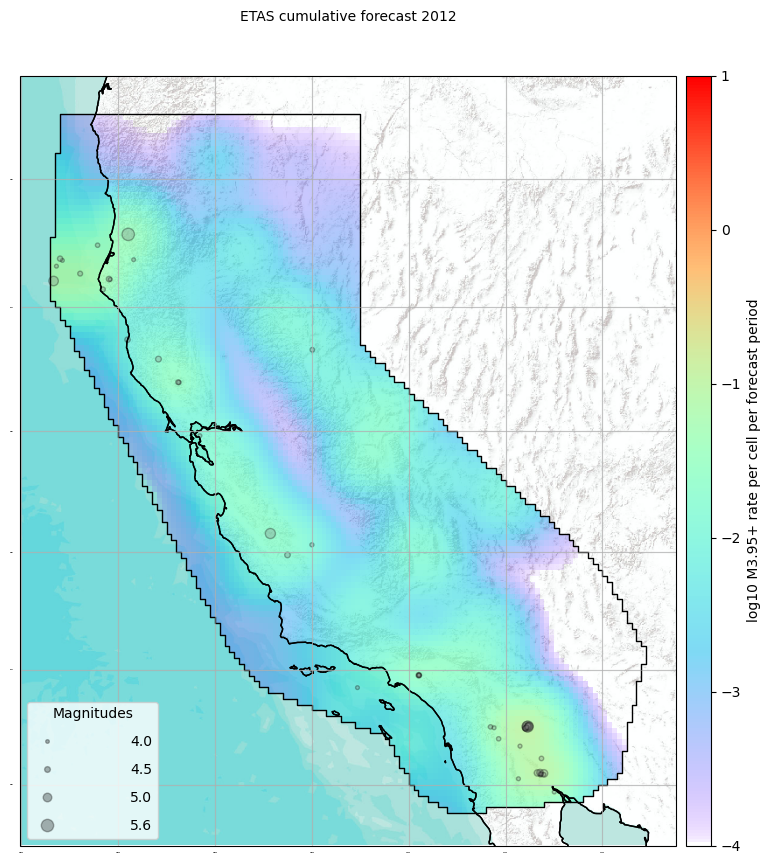

In [4]:
args_catalog = {'title': 'ComCat 2012', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'ETAS cumulative forecast 2012' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_ETAS.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)

### STEP

In [5]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyyy
                                     end_date = '31/12/2012')
#Optional to free memory space
del step_filename
# cumulative forecast 
cumulative_STEP = f_hdf5.get_cumulative_forecast(dict_fore = STEP, # dictonary representing a set of forecasts 
                                                 forecast_name = 'STEP', # name of the forecast used for plotting
                                                 all_dates = True) 
#Optional to free memory space
del STEP

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


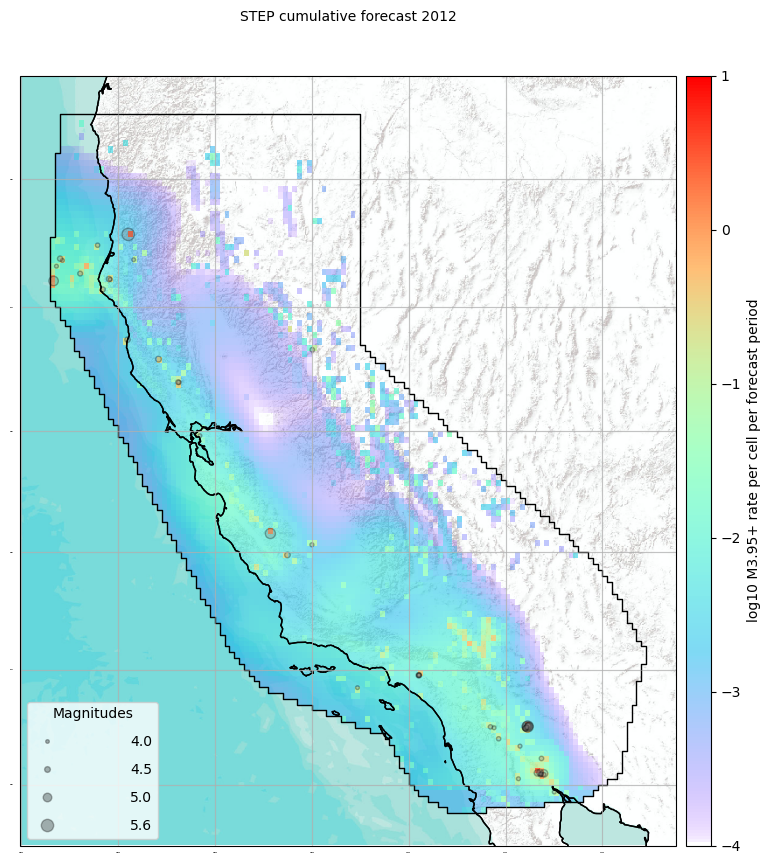

In [6]:
args_catalog = {'title': 'ComCat 2012', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'STEP cumulative forecast 2012' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_STEP.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)

### STEPJAVA

In [7]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyy
                                     end_date = '31/12/2012')
#Optional to free memory space
del STEPJAVA_filename
# cumulative forecast 
cumulative_STEPJAVA = f_hdf5.get_cumulative_forecast(dict_fore = STEPJAVA, # dictonary representing a set of forecasts 
                                                     forecast_name = 'STEPJAVA', # name of the forecast used for plotting
                                                     all_dates = True) 
#Optional to free memory space
del STEPJAVA

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


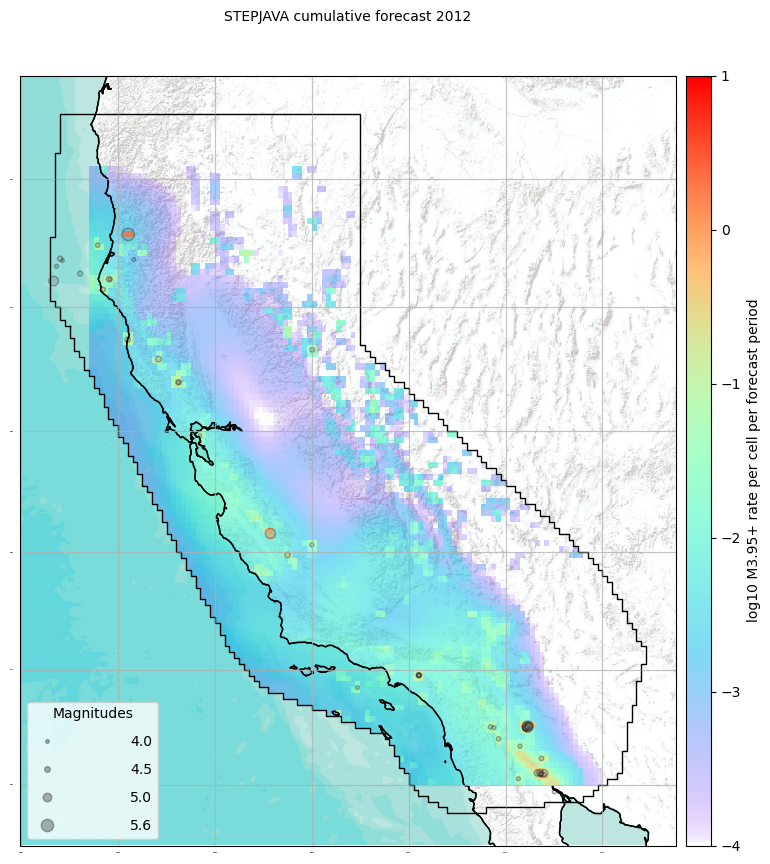

In [8]:
args_catalog = {'title': 'ComCat 2012', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'STEPJAVA cumulative forecast 2012' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_STEPJAVA.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)

### KJSSOneDay

In [9]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyy
                                     end_date = '31/12/2012')
#Optional to free memory space
del KJSSOne_filename
# cumulative forecast
cumulative_KJSSOneDay = f_hdf5.get_cumulative_forecast(dict_fore = KJSSOne, # dictonary representing a set of forecasts 
                                                 forecast_name = 'KJSSOneDay', # name of the forecast used for plotting
                                                 all_dates = True) 
#Optional to free memory space
del KJSSOne

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


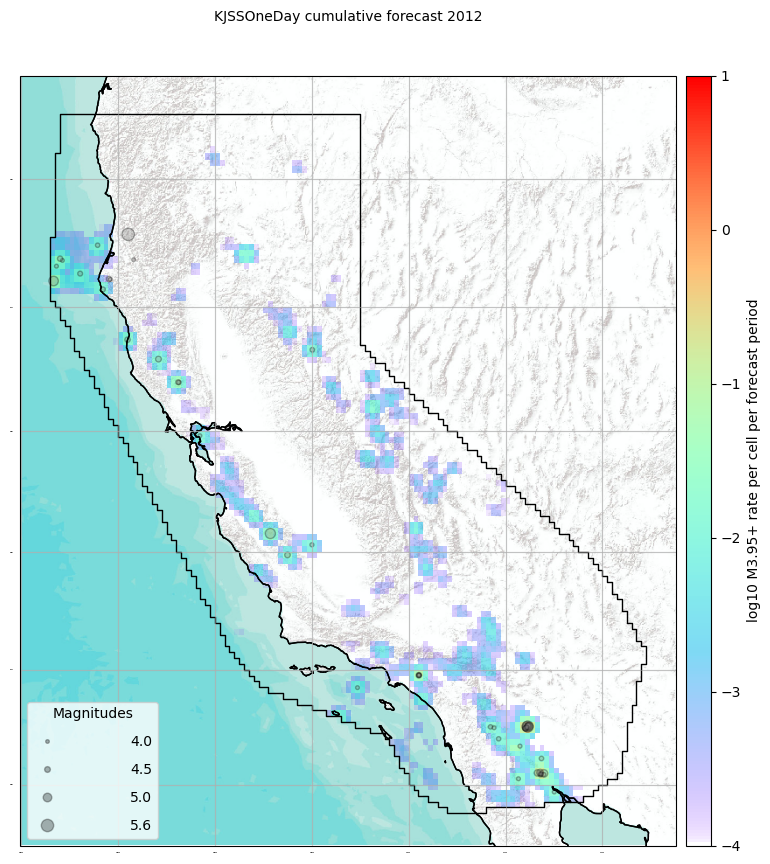

In [10]:
args_catalog = {'title': 'ComCat 2012', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'KJSSOneDay cumulative forecast 2012' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_KJSSOneDay.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)

## 2014

In [13]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2014-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2014-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

Fetched ComCat catalog in 0.36536383628845215 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2014-01-01 15:47:16.460000+00:00
End Date: 2014-12-31 09:01:13.130000+00:00
Min Latitude: 31.5005 and Max Latitude: 42.6121667
Min Longitude: -125.3946667 and Max Longitude: -113.2118
Min Magnitude: 2.5
Found 1521 events in the ComCat catalog.

        Name: None

        Start Date: 2014-01-02 06:23:09.700000+00:00
        End Date: 2014-12-24 05:51:51.440000+00:00

        Latitude: (32.2121667, 41.9278)
        Longitude: (-125.3838333, -115.6085)

        Min Mw: 3.95
        Max Mw: 6.8

        Event Count: 44
        


### STEPJAVA

In [14]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95
# model path
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

del STEPJAVA_filename
cumulative_STEPJAVA = f_hdf5.get_cumulative_forecast(dict_fore = STEPJAVA, # dictonary representing a set of forecasts 
                                                     forecast_name = 'STEPJAVA', # name of the forecast used for plotting
                                                     all_dates = True) 
del STEPJAVA

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


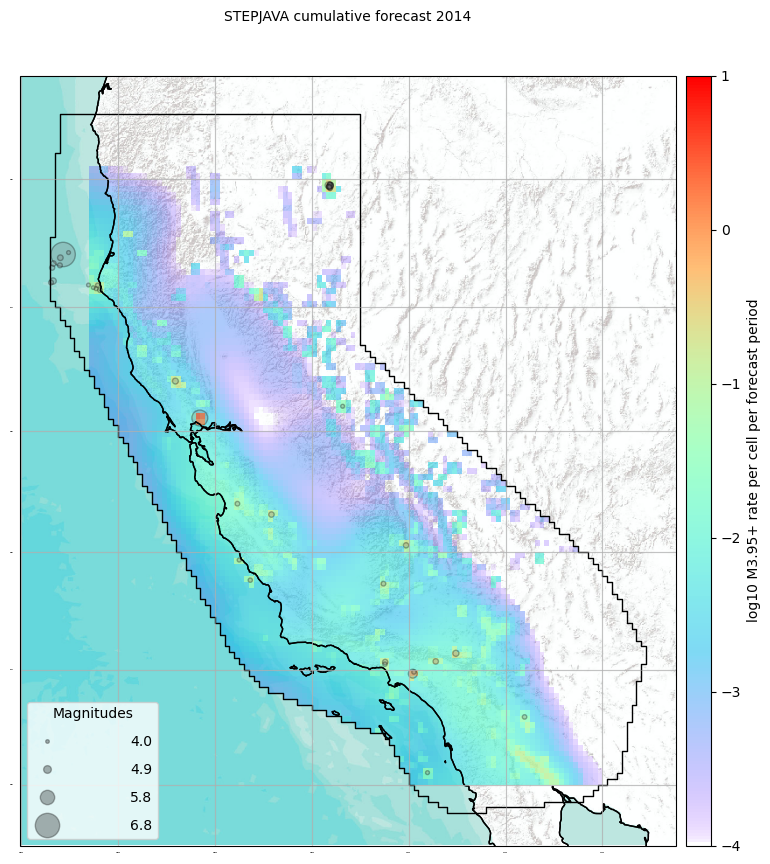

In [15]:
args_catalog = {'title': 'ComCat 2014', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'STEPJAVA cumulative forecast 2014' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_STEPJAVA.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)

## 2017

In [16]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2017-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2017-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

Fetched ComCat catalog in 1.955758810043335 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2017-01-01 00:04:56.020000+00:00
End Date: 2017-12-31 19:49:06.270000+00:00
Min Latitude: 31.5071667 and Max Latitude: 42.1398333
Min Longitude: -125.3621667 and Max Longitude: -113.1378333
Min Magnitude: 2.5
Found 961 events in the ComCat catalog.

        Name: None

        Start Date: 2017-02-21 00:57:52.710000+00:00
        End Date: 2017-12-14 04:57:18.580000+00:00

        Latitude: (32.225, 41.0753333)
        Longitude: (-125.3303333, -115.2278333)

        Min Mw: 3.95
        Max Mw: 5.08

        Event Count: 18
        


### STEPJAVA

In [17]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95
# model path
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

del STEPJAVA_filename
cumulative_STEPJAVA = f_hdf5.get_cumulative_forecast(dict_fore = STEPJAVA, # dictonary representing a set of forecasts 
                                                 forecast_name = 'STEPJAVA', # name of the forecast used for plotting
                                                 all_dates = True) 

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


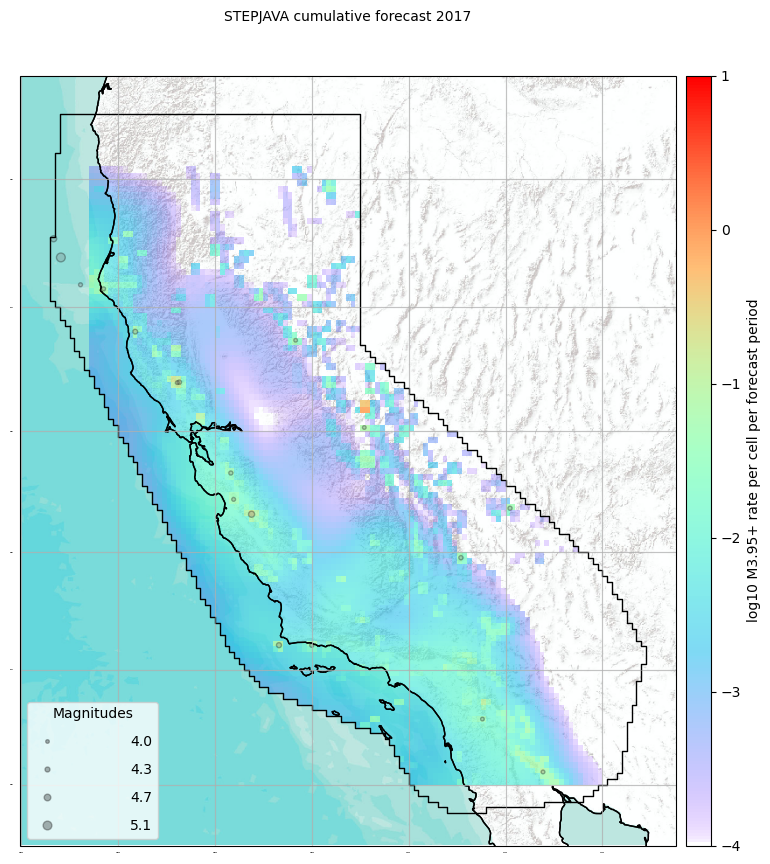

In [18]:
args_catalog = {'title': 'ComCat 2017', # set figure title 
                'basemap': 'ESRI_terrain', # set background map with ESRI_imagery shows a colored map
                'markercolor': 'red', # set color for observations
                'markersize': 1} # set size for observation
args_forecast = {'grid_labels': True,
                 'basemap': 'ESRI_imagery', # set background image if non a black and white (ESRI_terrain) version of the costline is used
                 'cmap': 'rainbow', # color palette for the logarithm of number of events 
                 'alpha_exp': 0.5, # level of trasparency
                 'projection': cartopy.crs.Mercator(), # projection
                 'clim':[-4, 1]} # limits of the color palette

args_catalog['title'] = 'STEPJAVA cumulative forecast 2017' # title of the plot
args_catalog['markercolor'] = 'grey' # color of the observations
ax_1 = cumulative_STEPJAVA.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)